In [5]:
import pandas as pd
from datetime import  datetime
data=pd.read_csv(r'H:\对比Excel,轻松学习Python数据分析数据集\order-14.3.csv',parse_dates=['成交时间'],encoding='gbk')
data.head()

,商品ID,类别ID,门店编号,单价,销量,成交时间,订单ID
0,30006206,915000003,CDNL,25.23,0.328,2017-01-03 09:56:00,20170103CDLG000210052759
1,30163281,914010000,CDNL,2.00,2.000,2017-01-03 09:56:00,20170103CDLG000210052759
2,30200518,922000000,CDNL,19.62,0.230,2017-01-03 09:56:00,20170103CDLG000210052759
3,29989105,922000000,CDNL,2.80,2.044,2017-01-03 09:56:00,20170103CDLG000210052759
4,30179558,915000100,CDNL,47.41,0.226,2017-01-03 09:56:00,20170103CDLG000210052759


In [8]:
data.groupby('类别ID')['销量'].sum().reset_index().head()

,类别ID,销量
0,910000000,24.0
1,910010000,7.0
2,910010002,1.0
3,910010101,6.0
4,910010301,2.0


In [10]:
data.groupby('类别ID')['销量'].sum().reset_index().sort_values(by='销量',ascending=False).head(10)

,类别ID,销量
240,922000003,425.328
239,922000002,206.424
251,923000006,190.294
216,915030104,175.059
238,922000001,121.355
367,960000000,121.000
234,920090000,111.565
249,923000002,91.847
237,922000000,86.395
247,923000000,85.845


In [12]:
pd.pivot_table(data,index='商品ID',values='销量',aggfunc='sum').reset_index().sort_values(by='销量',ascending=False).head()

,商品ID,销量
8,29989059,391.549
18,29989072,102.876
469,30022232,101.000
523,30031960,99.998
57,29989157,72.453


In [13]:
data['销售额']=data['销量']*data['单价']
data.head()

,商品ID,类别ID,门店编号,单价,销量,成交时间,订单ID,销售额
0,30006206,915000003,CDNL,25.23,0.328,2017-01-03 09:56:00,20170103CDLG000210052759,8.27544
1,30163281,914010000,CDNL,2.00,2.000,2017-01-03 09:56:00,20170103CDLG000210052759,4.00000
2,30200518,922000000,CDNL,19.62,0.230,2017-01-03 09:56:00,20170103CDLG000210052759,4.51260
3,29989105,922000000,CDNL,2.80,2.044,2017-01-03 09:56:00,20170103CDLG000210052759,5.72320
4,30179558,915000100,CDNL,47.41,0.226,2017-01-03 09:56:00,20170103CDLG000210052759,10.71466


In [14]:
data.groupby('门店编号')['销售额'].sum()

门店编号
CDLG    10908.82612
CDNL     8059.47867
CDXL     9981.76166
Name: 销售额, dtype: float64

In [16]:
data.groupby('门店编号')['销售额'].sum()/data['销售额'].sum()

门店编号
CDLG    0.376815
CDNL    0.278392
CDXL    0.344792
Name: 销售额, dtype: float64

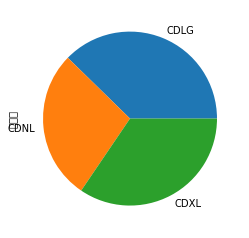

In [20]:
(data.groupby('门店编号')['销售额'].sum()/data['销售额'].sum()).plot.pie()

In [22]:
#利用自定义时间格式函数strftime提取小时数
data['小时']=data['成交时间'].map(lambda x:int (x.strftime("%H")))
#对小时和订单量去重
traffic=data[['小时','订单ID']].drop_duplicates()
#求每小时的客流量
traffic.groupby('小时')['订单ID'].count()

小时
6      10
7      37
8     106
9     156
10    143
11     63
13     30
14     36
15     17
16     50
17     73
18     71
19     71
20     39
21     16
Name: 订单ID, dtype: int64

In [23]:
data

,商品ID,类别ID,门店编号,单价,销量,成交时间,订单ID,销售额,小时
0,30006206,915000003,CDNL,25.23,0.328,2017-01-03 09:56:00,20170103CDLG000210052759,8.27544,9
1,30163281,914010000,CDNL,2.00,2.000,2017-01-03 09:56:00,20170103CDLG000210052759,4.00000,9
2,30200518,922000000,CDNL,19.62,0.230,2017-01-03 09:56:00,20170103CDLG000210052759,4.51260,9
3,29989105,922000000,CDNL,2.80,2.044,2017-01-03 09:56:00,20170103CDLG000210052759,5.72320,9
4,30179558,915000100,CDNL,47.41,0.226,2017-01-03 09:56:00,20170103CDLG000210052759,10.71466,9
5,30022232,960000000,CDNL,0.30,1.000,2017-01-03 09:56:00,20170103CDLG000210052759,0.30000,9
6,30179520,915000100,CDNL,77.52,0.086,2017-01-03 09:56:00,20170103CDLG000210052759,6.66672,9
7,30184351,915000106,CDNL,15.57,0.420,2017-01-03 09:56:00,20170103CDLG000210052759,6.53940,9
8,30184351,915000106,CDNL,15.58,0.470,2017-01-03 09:56:00,20170103CDLG000210052759,7.32260,9
9,29989059,922000003,CDNL,1.98,1.212,2017-01-03 09:56:00,20170103CDLG000210052759,2.39976,9


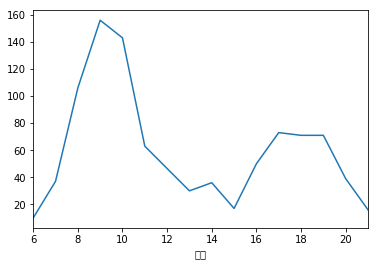

In [25]:
traffic.groupby('小时')['订单ID'].count().plot()